<a href="https://colab.research.google.com/github/gregh13/Exploring-Supervised-vs-Unsupervised-Learning-ML-TensorFlow/blob/main/Supervised_vs_Unsupervised_Learning_in_API_Security_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
import tensorflow_probability as tfp
import scipy.stats as stats
import seaborn as sns



In [ ]:
df_raw = pd.read_csv("supervised_dataset.csv")

In [ ]:
df_raw.head(5)

,Unnamed: 0,_id,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,num_sessions,num_users,num_unique_apis,source,classification
0,0,1f2c32d8-2d6e-3b68-bc46-789469f2b71e,0.000812,0.004066,85.643243,5405,default,1460.0,1295.0,451.0,E,normal
1,1,4c486414-d4f5-33f6-b485-24a8ed2925e8,0.000063,0.002211,16.166805,519,default,9299.0,8447.0,302.0,E,normal
2,2,7e5838fc-bce1-371f-a3ac-d8a0b2a05d9a,0.004481,0.015324,99.573276,6211,default,255.0,232.0,354.0,E,normal
3,3,82661ecd-d87f-3dff-855e-378f7cb6d912,0.017837,0.014974,69.792793,8292,default,195.0,111.0,116.0,E,normal
4,4,d62d56ea-775e-328c-8b08-db7ad7f834e5,0.000797,0.006056,14.952756,182,default,272.0,254.0,23.0,E,normal


In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699 entries, 0 to 1698
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      1699 non-null   int64  
 1   _id                             1699 non-null   object 
 2   inter_api_access_duration(sec)  1695 non-null   float64
 3   api_access_uniqueness           1695 non-null   float64
 4   sequence_length(count)          1699 non-null   float64
 5   vsession_duration(min)          1699 non-null   int64  
 6   ip_type                         1699 non-null   object 
 7   num_sessions                    1699 non-null   float64
 8   num_users                       1699 non-null   float64
 9   num_unique_apis                 1699 non-null   float64
 10  source                          1699 non-null   object 
 11  classification                  1699 non-null   object 
dtypes: float64(6), int64(2), object(4)

In [ ]:
df_raw.describe()

,Unnamed: 0,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),num_sessions,num_users,num_unique_apis
count,1699.00000,1695.000000,1695.000000,1699.000000,1.699000e+03,1699.000000,1699.000000,1699.000000
mean,849.00000,1.501123,0.173226,61.648982,6.028341e+03,564.726898,406.263685,67.246616
std,490.60337,21.697558,0.283641,205.803273,4.665042e+04,1179.931200,960.718580,82.189214
min,0.00000,0.000003,0.001200,0.000000,1.000000e+00,2.000000,1.000000,0.000000
25%,424.50000,0.000707,0.009199,9.984756,6.300000e+01,5.000000,1.000000,14.000000
50%,849.00000,0.002574,0.018717,17.095238,1.950000e+02,164.000000,141.000000,37.000000
75%,1273.50000,0.024579,0.230769,41.349478,3.711500e+03,446.500000,308.500000,90.000000
max,1698.00000,852.929250,1.000000,3303.000000,1.352948e+06,9299.000000,8447.000000,524.000000


In [ ]:
df_raw.duplicated().values.any()

False

In [ ]:
df_raw.isna().values.any()

True

In [ ]:
nan_rows = df_raw[df_raw.isna().values == True]
nan_rows.head(10)

,Unnamed: 0,_id,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,num_sessions,num_users,num_unique_apis,source,classification
1556,1556,8e8b99bb-7b6d-3437-9abc-1d884fe023d0,NaN,NaN,0.0,3,datacenter,2.0,1.0,0.0,E,outlier
1556,1556,8e8b99bb-7b6d-3437-9abc-1d884fe023d0,NaN,NaN,0.0,3,datacenter,2.0,1.0,0.0,E,outlier
1567,1567,bedfd600-80ef-3e95-8667-fa0d9a905d72,NaN,NaN,0.0,3,datacenter,4.0,1.0,0.0,E,outlier
1567,1567,bedfd600-80ef-3e95-8667-fa0d9a905d72,NaN,NaN,0.0,3,datacenter,4.0,1.0,0.0,E,outlier
1619,1619,60a25ad0-add8-3976-bc51-a7ff6779d5dc,NaN,NaN,0.0,3,datacenter,2.0,1.0,0.0,E,outlier
1619,1619,60a25ad0-add8-3976-bc51-a7ff6779d5dc,NaN,NaN,0.0,3,datacenter,2.0,1.0,0.0,E,outlier
1647,1647,70b6a9dd-e4c6-36a0-908d-2311c277b5e8,NaN,NaN,0.0,3,datacenter,4.0,1.0,0.0,E,outlier
1647,1647,70b6a9dd-e4c6-36a0-908d-2311c277b5e8,NaN,NaN,0.0,3,datacenter,4.0,1.0,0.0,E,outlier


In [ ]:
df_clean = df_raw.drop(nan_rows.index)
df_clean.shape

(1695, 12)

In [ ]:
df = df_clean.drop(['Unnamed: 0', '_id', "source"], axis=1)

In [ ]:
# Put classification column into an array for training
quant_class = [(0 if row == "normal" else 1) for row in df["classification"]]
y = np.array(quant_class)
y[0:10]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Number of anomalies in dataset
np.count_nonzero(y == 1)

589

In [ ]:
# Number of normal cases in dataset
np.count_nonzero(y == 0)

1106

In [ ]:
# Convert ip_type into a numerical 0 or 1 value, add column to table
quant_ip_type = [(0 if row == "default" else 1) for row in df["ip_type"]]
df["quant_ip_type"] = quant_ip_type
df.sample(10)

,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,num_sessions,num_users,num_unique_apis,classification,quant_ip_type
706,0.000831,0.006423,17.221239,195,default,281.0,226.0,25.0,normal,0
305,0.000574,0.055905,10.294964,50,default,199.0,139.0,80.0,normal,0
1081,0.000841,0.019543,16.818182,122,default,149.0,143.0,47.0,normal,0
19,0.012259,0.009315,82.713115,14845,default,256.0,244.0,188.0,normal,0
779,0.000100,0.006119,22.616216,126,default,1284.0,925.0,128.0,normal,0
51,0.021446,0.012578,33.941520,7469,default,193.0,171.0,73.0,normal,0
966,0.001424,0.007785,11.223301,99,default,101.0,103.0,9.0,normal,0
498,0.000911,0.027356,7.833333,54,default,133.0,126.0,27.0,normal,0
751,0.001069,0.022228,10.174387,240,default,499.0,367.0,83.0,normal,0
213,0.008142,0.009314,76.086957,8549,default,239.0,230.0,163.0,normal,0


In [ ]:
# Drop columns that are not numerical
df = df.drop(["classification", "ip_type"], axis=1)
df.sample(10)

,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),num_sessions,num_users,num_unique_apis,quant_ip_type
855,0.025912,0.017429,15.198675,3569,152.0,151.0,40.0,0
710,0.000462,0.017370,6.914216,79,457.0,408.0,49.0,0
784,0.000984,0.022222,5.547945,48,161.0,146.0,18.0,0
157,0.008139,0.015663,74.290909,3991,127.0,110.0,128.0,0
1635,0.124647,0.274510,51.000000,382,3.0,1.0,14.0,1
20,0.000980,0.005899,16.330275,210,280.0,218.0,21.0,0
373,0.000005,0.018145,32.847682,2,3573.0,151.0,90.0,0
914,0.000693,0.023220,8.229299,54,175.0,157.0,30.0,0
1423,0.062000,1.000000,2.000000,8,2.0,1.0,2.0,0
181,0.000406,0.006960,12.061856,200,706.0,679.0,57.0,0


In [ ]:
X_raw = df.to_numpy()
X_raw[1]

array([6.32464613e-05, 2.21146594e-03, 1.61668048e+01, 5.19000000e+02,
       9.29900000e+03, 8.44700000e+03, 3.02000000e+02, 0.00000000e+00])



---




Data has been loaded, cleaned, and prepared to begin using it for the learning models.

In [ ]:
# Easy Way: 
X_easy = stats.zscore(X_raw, axis=0)
print(f"Easy: {X_easy[1,:]}")

# Manual Way:
X_mean = np.mean(X_raw, axis=0)
X_std = np.std(X_raw, axis=0)
X = (X_raw - X_mean) / X_std
print(f"Manual: {X[1,:]}")

# Just for some coding fun
# 'Reinventing the Wheel'/'Sloth Slow' Way:
columns = X_raw.shape[1]
rows = X_raw.shape[0]
X_slow = np.zeros([rows,columns])
mean = np.zeros(columns)
std = np.zeros(columns)
for col in range(columns):
  for i in range(rows):
    mean[col] += X_raw[i,col]
for col in range(columns):
  mean[col] = mean[col] / rows
for col in range(columns):
  for i in range(rows):
    std[col] += ((X_raw[i,col] - mean[col])**2) / rows
std = np.sqrt(std)
for col in range(columns):
  for i in range(rows):
    X_slow[i,col] = (X_raw[i,col] - mean[col]) / std[col]

print(f"Stone Age: {X_slow[1,:]}")

Easy: [-0.06920146 -0.60310385 -0.22153276 -0.11830091  7.39667288  8.36286794
  2.85405856 -0.3149949 ]
Manual: [-0.06920146 -0.60310385 -0.22153276 -0.11830091  7.39667288  8.36286794
  2.85405856 -0.3149949 ]
Stone Age: [-0.06920146 -0.60310385 -0.22153276 -0.11830091  7.39667288  8.36286794
  2.85405856 -0.3149949 ]


In [ ]:
# Split dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=1)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X_train.shape (1017, 8) y_train.shape (1017,)
X_test.shape (678, 8) y_test.shape (678,)


In [ ]:
# 8 inputs, so start with a simple x2, x1, binary output architecture
model = Sequential(
    [
      Dense(units=16, activation="relu"),
      Dense(units=8, activation="relu"),
      Dense(units=1, activation="sigmoid", name="L3")
    ], name="NN"
)
model.compile(
    loss=BinaryCrossentropy(),
    optimizer=Adam(0.01)
)

In [ ]:
model.fit(
    X_train, y_train,
    epochs=100
)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.3880
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0382
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 7.8888e-04
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 9.9597e-04
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.3337e-04
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5142e-04
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 4.7314e-04
Epoch 13/100
32/3

In [ ]:
model.summary()

Model: "NN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                144       
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 L3 (Dense)                  (None, 1)                 9         
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def calc_cat_err(y, yhat):
    """ 
    Calculate the categorization error
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:|
      cerr: (scalar)             
    """
    m = len(y)
    incorrect = 0
    correct = 0
    for i in range(m):
        #print(f"Before: {yhat[i]}, {y[i]}")
        if yhat[i] < 0.5:
          yhat[i] = 0
        else:
          yhat[i] = 1
        #print(f"After: {yhat[i]}, {y[i]}")  
        if yhat[i] != y[i]:
            incorrect += 1
        else:
            correct += 1
    print(f"\n\n\nNumber of incorrect predictions: {incorrect}")
    print(f"Correct predictions: {correct} out of {m}\n")
    cerr = incorrect / m
    return(cerr)

In [ ]:
training_classification_error = calc_cat_err(y_train, model.predict(X_train))
test_classification_error = calc_cat_err(y_test, model.predict(X_test))
print(f"categorization error, training,    NN model: {training_classification_error:0.5f}")
print(f"categorization error, test,        NN model: {test_classification_error:0.5f}")




Number of incorrect predictions: 0
Correct predictions: 1017 out of 1017




Number of incorrect predictions: 0
Correct predictions: 678 out of 678

categorization error, training,    NN model: 0.00000
categorization error, test,        NN model: 0.00000




---


The results above show the model has learned to perfectly detect outliers, even with a simple model architecture and relatively low number of epochs. This most likely means that at least one or more of the features is highly reactive to an outlier and thus the NN can easily tell the difference. But perhaps what makes this pattern so clear for the NN is the fact that it's getting labelled data. Let's investigate how unsupervised learning fairs with the same dataset








---



First, let's investigate the anomaly detection model using multivariate gaussian norms

In [ ]:
# Calculates mean and variance of all features in the dataset
def estimate_gaussian(X): 
    m, n = X.shape
    mu = np.zeros(n)
    var = np. zeros(n)
    # Loops through every item in dataset
    for i in range(m):
        # Loops through each feature in a specific item
        for j in range(n):
            mu[j] += (X[i][j] / m)
    
    for i in range(m):
        for j in range(n):
            var[j] += ((X[i][j] - mu[j])**2) / m
        
    return mu, var

In [ ]:
# Returns the density of the multivariate normal at each data point of X_train
def calc_multivariate_gaussian(X, mu, var):
    mvn = tfp.distributions.MultivariateNormalDiag(
        loc=mu,
        scale_diag=var)
    p = mvn.prob(X).numpy()
    
    return p

In [ ]:
# Finds the best threshold to use for selecting outliers based on the results 
# from a validation set (p_val) and the ground truth (y_val)
def select_threshold(y_val, p_val): 
    counter = 0
    best_epsilon = 0
    best_F1 = 0
    F1 = 0
    true_pos = 0
    false_pos = 0
    false_neg = 0
    m = p_val.shape[0]
    step_size = (max(p_val) - min(p_val)) / 1000

    for epsilon in np.arange(min(p_val), max(p_val), step_size):
        p_decision = np.zeros(m)
        tp = 0
        fp = 0
        fn = 0
        
        for i in range(m):
            # Turns probability values into decision based on epsilon value
            if p_val[i] < epsilon:
                p_decision[i] = 1
                
            # Checks the predicted decision against the ground truth    
            if p_decision[i] and y_val[i] == 1:
                tp += 1
            else:
                # Checks for false positive (predict 1, actual is 0)
                if p_decision[i] > y_val[i]:
                    fp += 1
                # Checks for false negative (predict 0, actual is 1)
                elif p_decision[i] < y_val[i]:
                    fn += 1
        if tp != 0:
            prec = tp / (tp + fp)
            rec = tp / (tp + fn)
            F1 = (2*prec*rec) / (prec + rec)
        else:
            F1 = 0

        if F1 > best_F1:
            best_F1 = F1
            best_epsilon = epsilon
            true_pos = tp
            false_pos = fp
            false_neg = fn
        
    return best_epsilon, best_F1, true_pos, false_pos, false_neg



---



Before we begin to implement the gaussian model, we need to look into the data features to see the kind of distribution they each have.

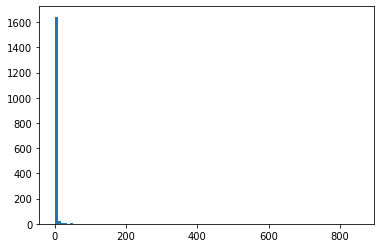

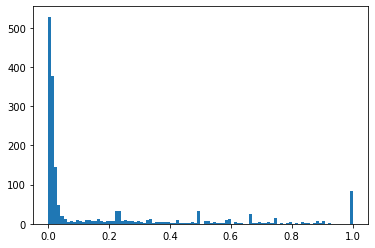

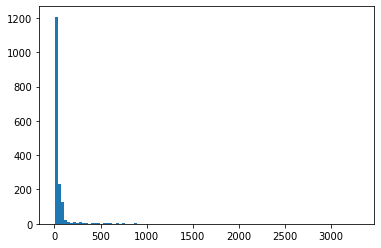

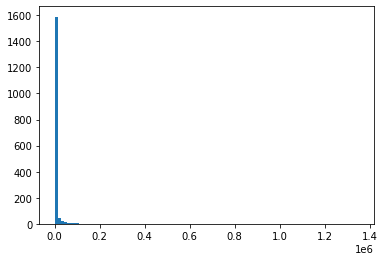

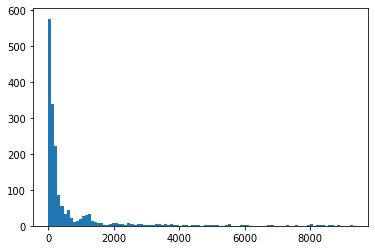

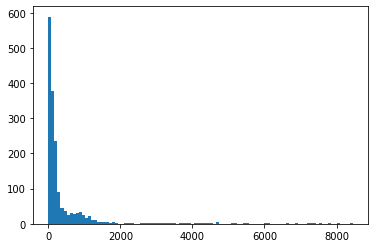

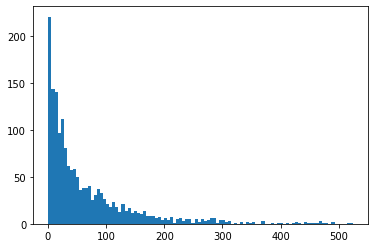

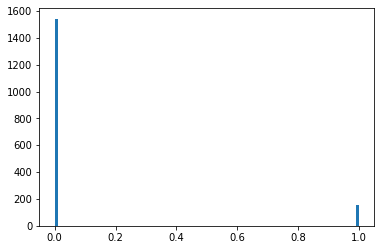

In [ ]:
for i in range(X_raw.shape[1]):
  plt.hist(X_raw[:,i], bins=100)
  plt.show()

The above are the original (not z-score adjusted) distributions for each of the features. All of them seem to be heavily skewed.



---


Let's see how a log transformation does to get the features closer to a normal distribution


In [ ]:
# Add a very small amount to the log to prevent any log(0) errors
# Only performing the log function of the first 7 columns as the last column is binary
X_log = X_raw
for i in range(7):
  X_log[:,i] = np.log(X_raw[:,i] + 0.00000001)

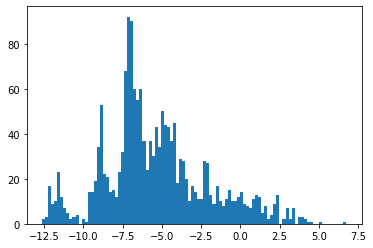

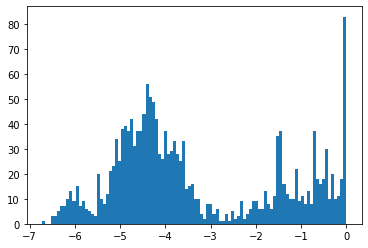

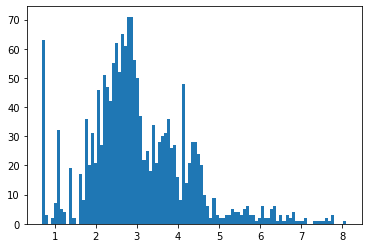

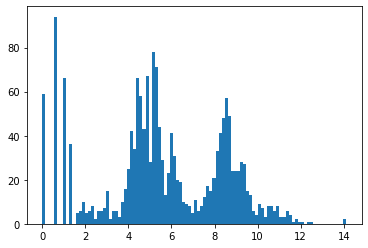

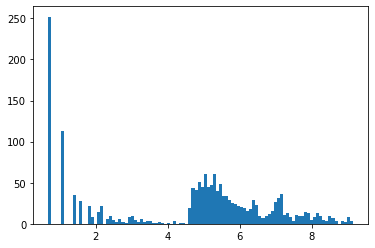

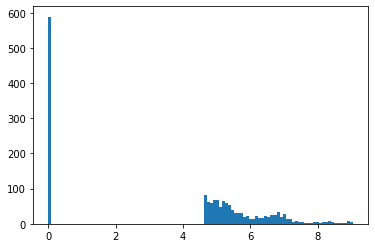

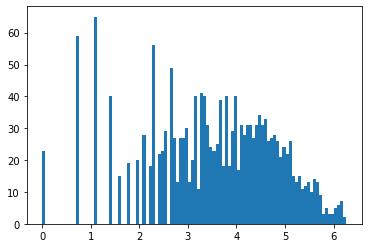

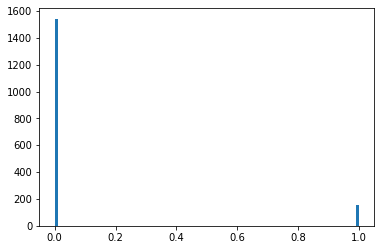

In [ ]:
for i in range(X_log.shape[1]):
  plt.hist(X_log[:,i], bins=100)
  plt.show()

While far from perfect (notice the double peaks for multiple features), this gets the data closer to a normal distribution than the original. Let's perform the z-score normalization once again.

In [ ]:
X_log_z = stats.zscore(X_log, axis=0)

In [ ]:
X_train_1, X_val, y_train_1, y_val = train_test_split(X_log_z,y,test_size=0.4, random_state=1)
print("X_train_1.shape", X_train_1.shape)
print("X_val.shape", X_val.shape, "y_val.shape", y_val.shape)

X_train_1.shape (1017, 8)
X_val.shape (678, 8) y_val.shape (678,)


In [ ]:
# Estimate the Gaussian parameters
mu, var = estimate_gaussian(X_train_1)    

# Evaluate the probabilites for the validation set
p_val = calc_multivariate_gaussian(X_val, mu, var)

# Evaluate the probabilites for the test set
p = calc_multivariate_gaussian(X_train_1, mu, var)

In [ ]:
# Find the best threshold
epsilon, F1, tp, fp, fn = select_threshold(y_val, p_val)
anomalies = sum(p_val < epsilon)
print('Best epsilon found using cross-validation: %e'% epsilon)
print('Best F1 on Cross Validation Set:  %f'% F1)
print('Model Reported Anomalies: %d'% anomalies)
actual_anomalies = np.count_nonzero(y_val == 1)
print(f"Actual Number of Anomalies: {actual_anomalies}")

Best epsilon found using cross-validation: 8.951474e-06
Best F1 on Cross Validation Set:  0.802444
Model Reported Anomalies: 267
Actual Number of Anomalies: 224


In [ ]:
print("Cross Validation Sample Results")
print(f"True positives = {tp}")
print(f"False positives = {fp}")
print(f"False negatives = {fn}")

Cross Validation Sample Results
True positives = 197
False positives = 70
False negatives = 27




---



The results above are not encouraging. Even with the optimal epsilon, the number of false positives and false negatives is much too high. Perhaps since this is unsupervised learning, the model simply does not have enough data to get a good grasp of what is an outlier and what isn't.



Let's try training it on a much larger dataset. This dataset is nearly 20 times bigger than the previous one.

In [ ]:
df_large_raw = pd.read_csv("remaining_behavior_ext.csv")

In [ ]:
df_large_raw.head(5)

,Unnamed: 0,_id,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,behavior,behavior_type,num_sessions,num_users,num_unique_apis,source
0,0,024aae60-1a81-3f37-bbe6-3f832c919706,7.010387,0.419355,31.0,13040,default,outlier,outlier,1.0,1.0,13.0,E
1,1,028d67dd-c6d0-329f-a20e-78db9eab7a55,51.419393,0.252336,107.0,330113,default,outlier,outlier,1.0,1.0,27.0,E
2,2,02d12bf9-5fe2-3d0c-b233-30e02224b686,25.860775,0.275000,40.0,62066,default,outlier,outlier,1.0,1.0,11.0,E
3,3,0b3aee1e-dc3b-3728-bc55-f57a23446b3d,0.205909,0.818182,11.0,136,default,outlier,outlier,1.0,1.0,9.0,E
4,4,0dbfffb4-3ed4-3cb2-904d-c348501a996e,0.122125,0.812500,16.0,118,default,outlier,outlier,1.0,1.0,13.0,E


In [ ]:
df_large_raw.duplicated().values.any()

False

In [ ]:
df_large_raw.isna().values.any()

True

In [ ]:
nan_rows = df_large_raw[df_large_raw.isna().values == True]
nan_rows.head(10)

,Unnamed: 0,_id,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,behavior,behavior_type,num_sessions,num_users,num_unique_apis,source
10642,10642,129e3eea-880a-3a7c-8931-b133d1a06397,NaN,NaN,0.0,3,default,outlier,outlier,2.0,1.0,0.0,E
10642,10642,129e3eea-880a-3a7c-8931-b133d1a06397,NaN,NaN,0.0,3,default,outlier,outlier,2.0,1.0,0.0,E


In [ ]:
df_lg_clean = df_large_raw.drop(nan_rows.index)
df_lg_clean.shape

(34422, 13)

In [ ]:
quant_ip_type_lg = [(0 if row == "default" else 1) for row in df_lg_clean["ip_type"]]
df_lg_clean["quant_ip_type"] = quant_ip_type_lg

In [ ]:
df_lg = df_lg_clean
df_lg = df_lg.drop(["Unnamed: 0", "_id", "behavior", "behavior_type", "ip_type", "source"], axis=1)

In [ ]:
df_lg.shape

(34422, 8)

In [ ]:
df_lg.head(5)

,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),num_sessions,num_users,num_unique_apis,quant_ip_type
0,7.010387,0.419355,31.0,13040,1.0,1.0,13.0,0
1,51.419393,0.252336,107.0,330113,1.0,1.0,27.0,0
2,25.860775,0.275000,40.0,62066,1.0,1.0,11.0,0
3,0.205909,0.818182,11.0,136,1.0,1.0,9.0,0
4,0.122125,0.812500,16.0,118,1.0,1.0,13.0,0


In [ ]:
X_raw_lg = df_lg.to_numpy()



---


Let's see what the distributions for each feature look like in this dataset

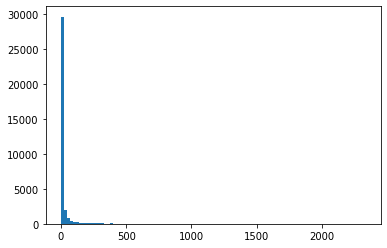

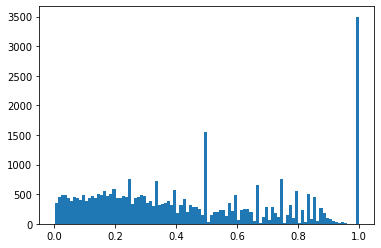

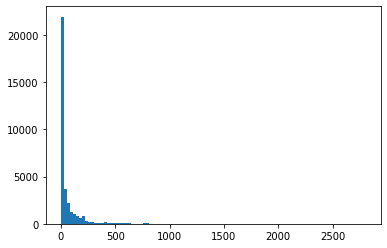

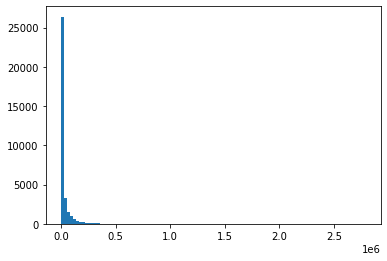

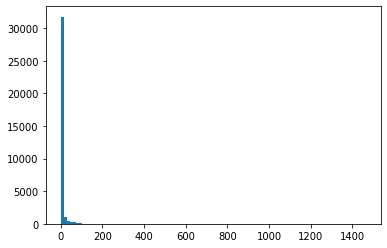

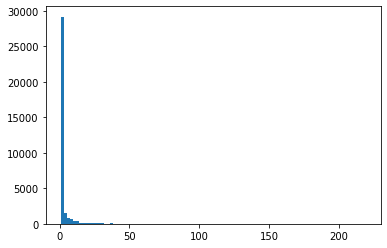

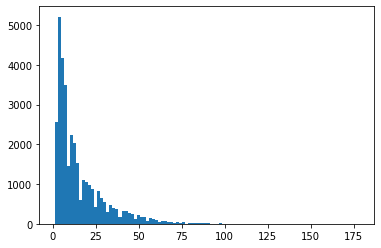

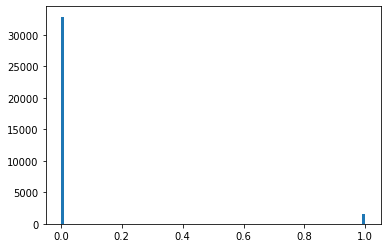

In [ ]:
for i in range(X_raw_lg.shape[1]):
  plt.hist(X_raw_lg[:,i], bins=100)
  plt.show()


These features are heavily skewed as well. Let's transform the distributions with a log function

In [ ]:
# Again, we'll take the log of the first 7 features as the last one is binary
X_log_lg = X_raw_lg
for i in range(7):
  X_log_lg[:,i] = np.log(X_raw_lg[:,i] + 0.00000001)

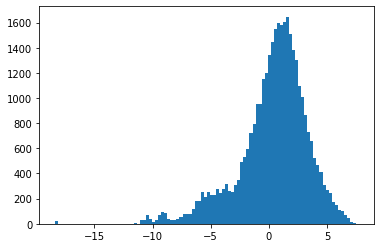

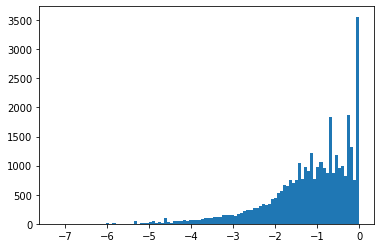

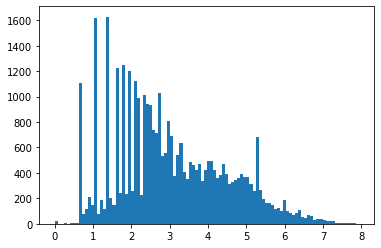

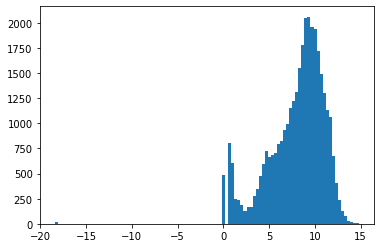

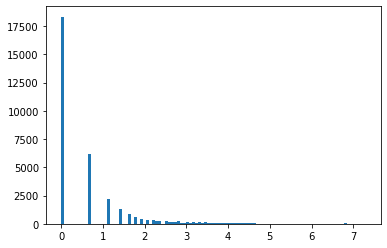

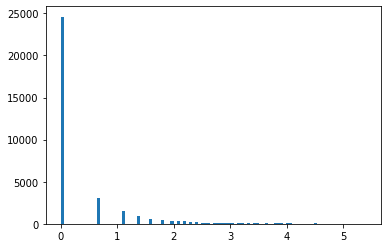

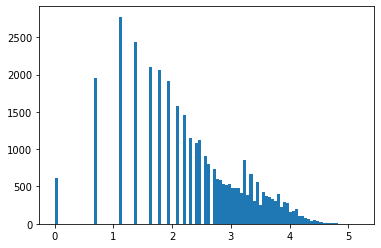

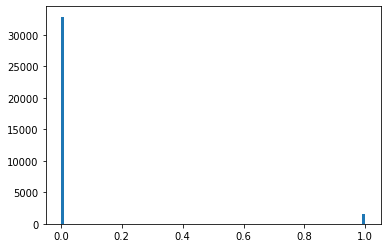

In [ ]:
for i in range(X_log_lg.shape[1]):
  plt.hist(X_log_lg[:,i], bins=100)
  plt.show()

These distribution looks much better! Let's normalize the values and see how they perform with the model below



---



In [ ]:
X_log_z_lg = stats.zscore(X_log_lg, axis=0)
X_log_z_lg[1:3,:]

array([[ 1.20582608, -0.20623597,  1.14836005,  1.54496218, -0.66679172,
        -0.51139441,  1.0301832 , -0.21515855],
       [ 0.97367931, -0.12158278,  0.47325321,  1.00178364, -0.66679172,
        -0.51139441,  0.10180553, -0.21515855]])

In [ ]:
# Optional step to create a random subset from entire population
# X_train_lg, _ = train_test_split(X_log_z_lg,test_size=0.1, random_state=1)
# print("X_train_lg.shape", X_train_lg.shape)

X_train_lg.shape (30979, 8)


In [ ]:
# Estimate the Gaussian parameters for large dataset
mu_lg, var_lg = estimate_gaussian(X_log_z_lg)    

# Evaluate the probabilites for the training set
p_lg = calc_multivariate_gaussian(X_train_1, mu_lg, var_lg)

# Evaluate the probabilites for the validation set
p_val_lg = calc_multivariate_gaussian(X_val, mu_lg, var_lg)


# Find the best threshold
epsilon_lg, F1_lg, tp_lg, fp_lg, fn_lg  = select_threshold(y_val, p_val_lg)
anomalies_lg = sum(p_val_lg < epsilon_lg)
print('Best epsilon found using cross-validation: %e'% epsilon_lg)
print('Best F1 on Cross Validation Set:  %f'% F1_lg)
print('Model Reported Anomalies: %d'% anomalies_lg)
actual_anomalies_lg = np.count_nonzero(y_val == 1)
print(f"Actual Number of Anomalies: {actual_anomalies_lg}")

Best epsilon found using cross-validation: 1.007867e-05
Best F1 on Cross Validation Set:  0.811475
Model Reported Anomalies: 264
Actual Number of Anomalies: 224


In [ ]:
print("Cross Validation Sample Results")
print(f"True positives = {tp_lg}")
print(f"False positives = {fp_lg}")
print(f"False negatives = {fn_lg}")

Cross Validation Sample Results
True positives = 198
False positives = 66
False negatives = 26


In [ ]:
print("Smaller Training Dataset")
print(f"Anomalies Detected: {anomalies}")
print(f"F1 Score: {F1}")
print("\n")
print("Larger Training Dataset")
print(f"Anomalies Detected: {anomalies_lg}")
print(f"F1 Score: {F1_lg}")

Smaller Training Dataset
Anomalies Detected: 267
F1 Score: 0.8024439918533605


Larger Training Dataset
Anomalies Detected: 264
F1 Score: 0.8114754098360656


In [ ]:
print("Smaller Training Dataset Validation Results:")
print(f"True positives = {tp}")
print(f"False positives = {fp}")
print(f"False negatives = {fn}")
print("\n")
print("Larger Training Dataset Validation Results:")
print(f"True positives = {tp_lg}")
print(f"False positives = {fp_lg}")
print(f"False negatives = {fn_lg}")

Smaller Training Dataset Validation Results:
True positives = 197
False positives = 70
False negatives = 27


Larger Training Dataset Validation Results:
True positives = 198
False positives = 66
False negatives = 26




---



Suprisingly, even with a much larger dataset, the gaussian model made only an incredibly small improvement. While we could investigate transforming the distributions further, or conduct feature engineering to look for better anomaly indicators, let's see if there isn't a better type of unsupervised learning model that more appropriately fits this dataset.



---



Investigate K-Means Clustering

Let's see how an unsupervised clustering model performs on the same dataset

In [ ]:
# Computes the centroid memberships for every example

def find_closest_centroids(X, centroids):
    K = centroids.shape[0]
    idx = np.zeros(X.shape[0], dtype=int)

    for i in range(0, len(idx)):
        distances = []
        for k in range(0, K):
            d_ik = (X[i] - centroids[k])**2
            sum = 0.0
            for p in d_ik:
                sum += p
            distances.append(sum)
        min_dist = min(distances)
        k_index = distances.index(min_dist)
        idx[i] = k_index

    
    return idx

In [ ]:
# Returns the new centroids by computing the means of the data points assigned to each centroid.

def compute_centroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))

    # Gets the count of items in each centroid 
    centroid_count = np.zeros((K,))
    centroid_index_list = []
    # Makes a list of centroid indexes for next step (allows for easier loop check)
    for i in range(K):
        centroid_index_list.append(i)
    
    # Calculate total number of items associated with each centroid
    for i in range(m):
        k_index = idx[i]
        if k_index in centroid_index_list:
            centroid_count[k_index] += 1

    # Loops through all of the data points/items        
    for i in range(m):
        k_index = idx[i]
        for j in range(n):
            # To avoid a second set for loops, divide by average at each item in summation
            averaged_sum = X[i][j] / centroid_count[k_index]
            centroids[k_index][j] += averaged_sum

    return centroids

In [ ]:
# This function initializes K centroids that are to be used in K-Means on the dataset X

def kMeans_init_centroids(X, K):
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

In [ ]:
# Runs the K-Means algorithm on data matrix X, where each row of X is a single example

def run_kMeans(X, initial_centroids, max_iters=10):

    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    
    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)

    # plt.show() 
    return centroids, idx

In [ ]:
K = 2                       
max_iters = 30               

# Get initial cluster locations
initial_centroids = kMeans_init_centroids(X_train_1, K) 

# Run K-Means on original(smaller) training set
centroids, idx = run_kMeans(X_train_1, initial_centroids, max_iters) 

K-Means iteration 0/29
K-Means iteration 1/29
K-Means iteration 2/29
K-Means iteration 3/29
K-Means iteration 4/29
K-Means iteration 5/29
K-Means iteration 6/29
K-Means iteration 7/29
K-Means iteration 8/29
K-Means iteration 9/29
K-Means iteration 10/29
K-Means iteration 11/29
K-Means iteration 12/29
K-Means iteration 13/29
K-Means iteration 14/29
K-Means iteration 15/29
K-Means iteration 16/29
K-Means iteration 17/29
K-Means iteration 18/29
K-Means iteration 19/29
K-Means iteration 20/29
K-Means iteration 21/29
K-Means iteration 22/29
K-Means iteration 23/29
K-Means iteration 24/29
K-Means iteration 25/29
K-Means iteration 26/29
K-Means iteration 27/29
K-Means iteration 28/29
K-Means iteration 29/29


In [ ]:
idx.shape

(1017,)

So now we have the model's clusters, lets look at how well they did capturing the outliers. Note that below matches the cluster id (0 or 1) to the target classification (0 or 1), however the cluster id '0' does not necessarily mean 'normal' and vice verse for the cluster id '1'. This means that if you run the kmeans model multiple times, the below results may 'flip' depending on which cluster id is linked to the outliers (1)

In [ ]:
err = calc_cat_err(y_train_1, idx)
print(f"Classification error: {err:0.5f}")
print(f"Percent error: {err*100:0.2f}%")




Number of incorrect predictions: 3
Correct predictions: 1014 out of 1017

Classification error: 0.00295
Percent error: 0.29%


The unsupervised clustering model did an excellent job on the training set! Let's check how it would classify data from the validation set to make sure the model isn't overfitted.

In [ ]:
idx_val = find_closest_centroids(X_val, centroids)

In [ ]:
idx_val.shape

(678,)

In [ ]:
err = calc_cat_err(y_val, idx_val)
print(f"Classification error: {err:0.5f}")
print(f"Percent error: {err*100:0.2f}%")




Number of incorrect predictions: 4
Correct predictions: 674 out of 678

Classification error: 0.00590
Percent error: 0.59%


Excellent! This means the model is able to highly accurately detect anomalies! While not perfect like the supervised NN model above, this model obtain exceptionally high accuracy without any labelled data to train on. The skewed and highly reactive feature set made the gaussian model not a good choice, however it made for a very easy time for the supervised neural network and unsupervised k-means clustering to detect anomalies.